In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image

In [2]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [3]:
imS = (224,224)
C = tf.keras.Sequential([
    hub.KerasLayer(classifier_url,input_shape=imS+(3,))
])

In [11]:
lp = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imnet_labels = np.array(open(lp).read().splitlines())

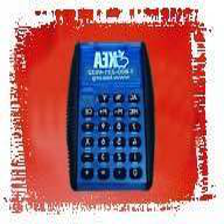

In [22]:
I = Image.open(r'C:\Users\DeLL\Desktop\ML\CNN\Data\256_ObjectCategories\027.calculator\027_0012.jpg').resize(imS)
I

In [23]:
I = np.array(I)/255.0
I.shape

(224, 224, 3)

In [24]:
r = C.predict(I[np.newaxis,...])
r.shape

(1, 1001)

In [25]:
pc = np.argmax(r[0],axis=-1)
pc

708

Text(0.5, 1.0, 'pay-phone')

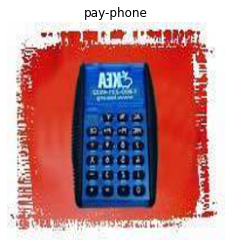

In [26]:
plt.imshow(I)
plt.axis('off')
pcn = imnet_labels[pc]
plt.title(pcn)

In [27]:
data_root = tf.keras.utils.get_file(
'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
untar=True)

In [28]:
ig = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
imData = ig.flow_from_directory(str(data_root),target_size=imS)

Found 3670 images belonging to 5 classes.


In [29]:
for imB,lbB in imData:
    print(imB.shape)
    print(lbB.shape)
    break

(32, 224, 224, 3)
(32, 5)


In [30]:
rB = C.predict(imB)
rB.shape

(32, 1001)

In [32]:
pcn = imnet_labels[np.argmax(rB,axis=-1)]
pcn

array(["yellow lady's slipper", 'daisy', 'daisy', 'daisy', 'head cabbage',
       'daisy', 'candle', 'cardoon', 'ladybug', 'ladybug', 'cardoon',
       'daisy', 'daisy', 'picket fence', 'ice lolly', 'daisy', 'vase',
       'porcupine', 'cauliflower', 'ear', 'picket fence', 'cardoon',
       'sea urchin', 'sea urchin', 'bubble', 'mailbox',
       'cabbage butterfly', 'hip', 'bonnet', 'sea urchin', 'picket fence',
       'conch'], dtype='<U30')

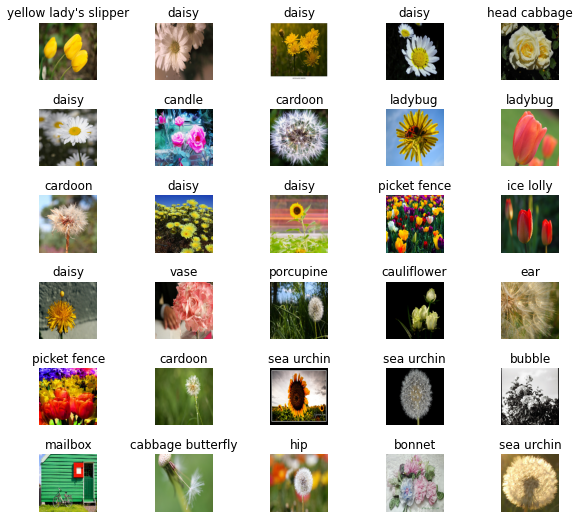

In [35]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    plt.title(pcn[i])
    plt.axis('off')

In [36]:
headLessModel_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [37]:
headLessModel = hub.KerasLayer(headLessModel_url,input_shape=imS+(3,))

In [38]:
fImB = headLessModel(imB)
fImB.shape

TensorShape([32, 1280])

In [39]:
headLessModel.trainable = False

In [40]:
newModel = tf.keras.Sequential([
    headLessModel,
    tf.keras.layers.Dense(imData.num_classes,activation='softmax')
])

In [41]:
newModel.compile(
optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=['acc'])

In [42]:
newModel.fit(imData,epochs=10)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 115 steps
Epoch 1/10
115/115 [==============================] - 129s 1s/step - loss: 1.2078 - acc: 0.7384
Epoch 2/10
115/115 [==============================] - 115s 997ms/step - loss: 1.0558 - acc: 0.8804
Epoch 3/10
115/115 [==============================] - 115s 1s/step - loss: 1.0256 - acc: 0.9035
Epoch 4/10
115/115 [==============================] - 114s 991ms/step - loss: 1.0083 - acc: 0.9163
Epoch 5/10
115/115 [==============================] - 114s 990ms/step - loss: 0.9950 - acc: 0.9332
Epoch 6/10
115/115 [==============================] - 117s 1s/step - loss: 0.9845 - acc: 0.9431
Epoch 7/10
115/115 [==============================] - 115s 1s/step - loss: 0.9775 - acc: 0.9512
Epoch 8/10
115/115 [==============================] - 115s 1s/step - loss: 0.9706 - acc: 0.9556
Epoch 9/10
115/115 [==============================] - 114s 994ms/step - loss: 0.9646 - acc: 0.9605
Epoch 10/10
115/115 [==============================] - 114s 990ms/step - loss: 0.9602 - acc: 0.9632


In [43]:
cn = np.array(['Daisy','Dandelion','Roses','Sunflowers','Tulips'])

In [44]:
p = newModel.predict(imB)
p_ids = np.argmax(p,axis=-1)
pcn = cn[p_ids]

In [45]:
l_ids = np.argmax(lbB,axis=-1)

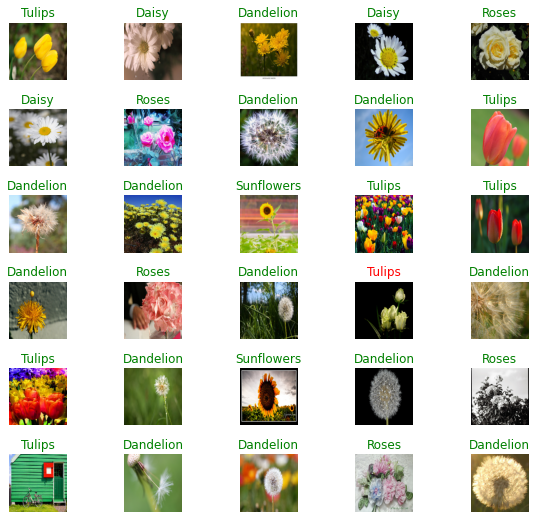

In [46]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    color = 'green' if p_ids[i] == l_ids[i] else 'red'
    plt.title(pcn[i].title(),color=color)
    plt.axis('off')